In [1]:
import numpy as np
from metrics.iou import IoU
from PIL import Image
import matplotlib.pyplot as plt

from metrics.get_indexMap import get_indMap
from utils.matterport3d_categories import mp3dcat
from utils.mapping_utils import load_map


In [2]:
scene_id = "apartment_0_1"
vln ="hello"#"dummy_geo_dist4_reverse3_4llava_wall4"#"dummy_geo_dist4_reverse3_4llava_wall"#"dummy_geo_dist4_reverse3_4llava" #"dummy_geo_dist4_reverse3" #^ lseg, seem, seem_conf

In [3]:
path = "/home/hong/VLMAPS/vlseem/Data/habitat/vlmaps_dataset/"+scene_id+"/map/"
gt_path = "/nvme0n1/hong/VLMAPS/InstanceSeemMap/Data/habitat_sim/vlmaps_dataset/apartment_0_1/map/grid_test_gt.npy" #path + "grid_lseg_gt.npy"
pred_path = "/nvme0n1/hong/VLMAPS/InstanceSeemMap/Data/habitat_sim/vlmaps_dataset/apartment_0_1/map/apartment_0_1_seem/grid_seem.npy" #path + f"grid_lseg_{vln}.npy"
obstacle_path = "/nvme0n1/hong/VLMAPS/InstanceSeemMap/Data/habitat_sim/vlmaps_dataset/apartment_0_1/map/obstacles_test.npy"#path + f"obstacles_{vln}.npy"
color_top_down_path = "/nvme0n1/hong/VLMAPS/InstanceSeemMap/Data/habitat_sim/vlmaps_dataset/apartment_0_1/map/color_top_down_test.npy"#path + f"color_top_down_{vln}.npy"
print(gt_path,pred_path,sep='\n')

/nvme0n1/hong/VLMAPS/InstanceSeemMap/Data/habitat_sim/vlmaps_dataset/apartment_0_1/map/grid_test_gt.npy
/nvme0n1/hong/VLMAPS/InstanceSeemMap/Data/habitat_sim/vlmaps_dataset/apartment_0_1/map/apartment_0_1_seem/grid_seem.npy


804 1393 886 1259


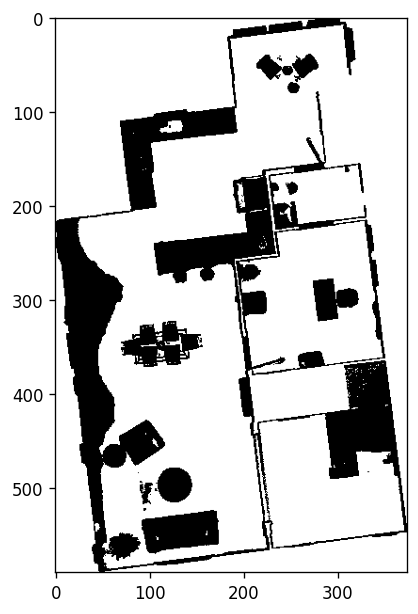

In [4]:
mp3dcat = ['undefined', 'base-cabinet', 'basket', 'bathtub', 'bed', 'blinds', 'book', 'bottle', 'cabinet', 'chair', 'comforter', 'cup', 'cushion', 'curtain', 'ceiling', 'cooktop', 'countertop', 'desk', 'door', 'faucet', 'floor', 'handrail', 'indoor-plant', 'lamp', 'major-appliance', 'mat', 'nightstand', 'panel', 'picture', 'pillow', 'plant-stand', 'plate', 'pot', 'rack', 'refrigerator', 'shower-stall', 'sink', 'sofa', 'stair', 'stool', 'switch', 'table', 'toilet', 'vase', 'vent', 'wall', 'wall-cabinet', 'wall-plug', 'window', 'rug']
obstacle_map = load_map(obstacle_path)
gt_map = load_map(gt_path)
gt_map[gt_map == -1] = len(mp3dcat)
pred_map = load_map(pred_path)

x_indices, y_indices = np.where(obstacle_map == 0)
xmin = np.min(x_indices)
xmax = np.max(x_indices)
ymin = np.min(y_indices)
ymax = np.max(y_indices)

print(xmin, xmax, ymin, ymax)
obstacles_pil = Image.fromarray(obstacle_map[xmin:xmax+1, ymin:ymax+1])
plt.figure(figsize=(8, 6), dpi=120)
plt.imshow(obstacles_pil, cmap='gray')
plt.show()

gt_map = gt_map[xmin:xmax+1, ymin:ymax+1]
pred_map = pred_map[xmin:xmax+1, ymin:ymax+1]

In [5]:
ind_map = get_indMap(pred_map, vln, mp3dcat, [xmax,xmin,ymax,ymin])

[*] model loaded
(590, 374)
embeddings: 89


In [6]:
print(f"gt: {gt_map.shape}, pred: {ind_map.shape}")

# Initialize IoU metric calculator
iou_metric = IoU(num_classes=len(mp3dcat)+1)#, ignore_index=[1,2])#[0,1,2])

# Add the predicted and target data to the metric calculator
iou_metric.add(ind_map,gt_map)

# Compute and print the metrics
iou, miou, acc, fwiou, mf1, recalls, recall, precisions, precision = iou_metric.value()
print(f"IoU per class: {iou}")
print(f"Mean IoU: {miou}")
print(f"Accuracy: {acc}")
print(f"Fwiou: {fwiou}")
print(f"Mean F1: {mf1}")
print(f"Mean Recall: {recall}")
print(f"Mean Precision: {precision}")
print(f"Recall per class: {recalls}")
print(f"Precision per class: {precisions}")

gt: (590, 374), pred: (590, 374)
49 0 51
<class 'numpy.ndarray'>
(51, 51)
IoU per class: [0.86223506 0.         0.                nan        nan 0.
 0.         0.         0.         0.67954687        nan 0.
 0.                nan 0.         0.72956909 0.05421076 0.
 0.11285794 0.         0.80153246 0.         0.60537022 0.12953876
 0.         0.                nan 0.         0.         0.
 0.         0.         0.         0.         0.58293839 0.
 0.09007418 0.80311891 0.44131691 0.         0.         0.17770184
 0.         0.                nan 0.16895413 0.         0.
 0.47786177 0.41950086        nan]
Mean IoU: 0.1621892760535553
Accuracy: 0.7849995468141031
Fwiou: 0.7048748939987908
Mean F1: 0.5619683641954099
Mean Recall: 0.24166365318727542
Mean Precision: 0.4369005100603983
Recall per class: [0.96430415 0.         0.                nan        nan 0.
 0.         0.         0.         0.92306071        nan 0.
 0.                nan 0.         0.94970986 0.05495959 0.
 0.12137681 0

In [7]:
print(f"gt: {gt_map.shape}, pred: {ind_map.shape}")

# Initialize IoU metric calculator
iou_metric = IoU(num_classes=len(mp3dcat)+1, ignore_index=[])

# Add the predicted and target data to the metric calculator
iou_metric.add(ind_map,gt_map)

# Compute and print the metrics
iou, miou, acc, fwiou, mf1, recalls, recall, precisions, precision = iou_metric.value()
print(f"IoU per class: {iou}")
print(f"Mean IoU: {miou}")
print(f"Accuracy: {acc}")
print(f"Fwiou: {fwiou}")
print(f"Mean F1: {mf1}")
print(f"Mean Recall: {recall}")
print(f"Mean Precision: {precision}")
print(f"Recall per class: {recalls}")
print(f"Precision per class: {precisions}")

gt: (590, 374), pred: (590, 374)
49 0 51
<class 'numpy.ndarray'>
(51, 51)
IoU per class: [0.86223506 0.         0.                nan        nan 0.
 0.         0.         0.         0.67954687        nan 0.
 0.                nan 0.         0.72956909 0.05421076 0.
 0.11285794 0.         0.80153246 0.         0.60537022 0.12953876
 0.         0.                nan 0.         0.         0.
 0.         0.         0.         0.         0.58293839 0.
 0.09007418 0.80311891 0.44131691 0.         0.         0.17770184
 0.         0.                nan 0.16895413 0.         0.
 0.47786177 0.41950086        nan]
Mean IoU: 0.1621892760535553
Accuracy: 0.7849995468141031
Fwiou: 0.7048748939987908
Mean F1: 0.5619683641954099
Mean Recall: 0.24166365318727542
Mean Precision: 0.4369005100603983
Recall per class: [0.96430415 0.         0.                nan        nan 0.
 0.         0.         0.         0.92306071        nan 0.
 0.                nan 0.         0.94970986 0.05495959 0.
 0.12137681 0

In [8]:
print(len(mp3dcat)+1)

51


In [9]:
MPA=[]
MIOU=[]
F1=[]
aa=[]
FWIOU=[]

#! all index used
mask = (gt_map == ind_map)
pa = np.sum(mask) / mask.size

#! ignore index 0~3
# valid_mask = (gt > 2) & (predicts > 2)  # a와 b 모두 3 이상인 위치만 고려
# comparison_mask = (gt == predicts) & valid_mask  # 유효한 위치에서 값이 동일한 경우 True

# # 유효한 위치에 대한 Pixel Accuracy (PA) 계산
# pa = np.sum(comparison_mask) / np.sum(valid_mask)




for i in range(len(mp3dcat)):
    # if i<3: continue
    if i < 3 : continue
    m1 = (gt_map==i)
    m2 = (ind_map==i)
    # if np.sum(m1)==0: continue
    # if np.sum(m1)<100: continue
    mpa_i=np.sum(np.logical_and(m1,m2))/np.sum(m1)
    miou_i=np.sum(np.logical_and(m1,m2))/np.sum(np.logical_or(m1,m2))
    fwiou_i=np.sum(m1)*miou_i
    f1_i=2*np.sum(np.logical_and(m1,m2))/(np.sum(np.logical_or(m1,m2))+np.sum(np.logical_and(m1,m2)))
    MPA.append(mpa_i)
    MIOU.append(miou_i)
    F1.append(f1_i)
    aa.append(np.sum(m1))
    FWIOU.append(fwiou_i)

/tmp/ipykernel_334583/2322478573.py:28: RuntimeWarning: invalid value encountered in long_scalars
  mpa_i=np.sum(np.logical_and(m1,m2))/np.sum(m1)
/tmp/ipykernel_334583/2322478573.py:29: RuntimeWarning: invalid value encountered in long_scalars
  miou_i=np.sum(np.logical_and(m1,m2))/np.sum(np.logical_or(m1,m2))
/tmp/ipykernel_334583/2322478573.py:31: RuntimeWarning: invalid value encountered in long_scalars
  f1_i=2*np.sum(np.logical_and(m1,m2))/(np.sum(np.logical_or(m1,m2))+np.sum(np.logical_and(m1,m2)))


In [10]:
mpa=np.nanmean(MPA)
miou=np.nanmean(MIOU)
f1=np.nanmean(F1)
fwiou=np.nansum(FWIOU)/np.nansum(aa)

print("####")
print(np.sum(aa))
print(mask.size)


print(len(MPA),len(MIOU),len(F1),len(aa))
# print(mpa,miou,f1,fwiou)
print(f"pa : {pa}")
print(f"mpa : {mpa}")
print(f"miou : {miou}")
print(f"f1 : {f1}")
print(f"fwiou : {fwiou}")
print(f"aa : {np.sum(aa)}")
print(f"mask_size : {mask.size}")
print("##########################################")
print(pa)
print(MPA)
print(MIOU)
print(F1)
print(aa)
print(np.sum(aa))

####
145001
220660
47 47 47 47
pa : 0.7849995468141031
mpa : 0.2356808234439407
miou : 0.1530266607395187
f1 : 0.19671883184921188
fwiou : 0.6233855245892141
aa : 145001
mask_size : 220660
##########################################
0.7849995468141031
[nan, nan, 0.0, 0.0, 0.0, 0.0, 0.9230607082630692, nan, 0.0, 0.0, nan, 0.0, 0.9497098646034816, 0.054959588537839825, 0.0, 0.1213768115942029, 0.0, 0.8259611409673419, 0.0, 0.7294117647058823, 0.2888402625820569, 0.0, 0.0, nan, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, 0.6542553191489362, 0.0, 0.7634730538922155, 0.927405740011255, 0.44864588656106286, 0.0, 0.0, 0.6456285566476979, 0.0, 0.0, nan, 0.8092365300603287, 0.0, 0.0, 0.6408399710354815, 0.6444277391467769]
[nan, nan, 0.0, 0.0, 0.0, 0.0, 0.6795468653010552, nan, 0.0, 0.0, nan, 0.0, 0.7295690936106983, 0.054210755181910424, 0.0, 0.1128579449747333, 0.0, 0.8015324594570199, 0.0, 0.6053702196908055, 0.1295387634936212, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5829383886255924, 0.0